<img src="https://pm1.narvii.com/5887/02b61b74eaec1060b56a3fcfed42ecc24a457a2e_hq.jpg">

In this hands-on, we will use the Marvel dataset to practice using different plots to visualize distributions of values between groups. You are free to come up with you own questions and use one of the categorical plots to help answer each question. You are also free to build your own dataframe that contains a specific subset of the data to help you answer your questions.

The dataset is in https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv

Data source: https://github.com/fivethirtyeight/data/tree/master/comic-characters

| Variable |	Definition |
| :------- | :-
|page_id|	The unique identifier for that characters page within the wikia
|name|	The name of the character
|urlslug|	The unique url within the wikia that takes you to the character
|ID|	The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity])
|ALIGN|	If the character is Good, Bad or Neutral
|EYE|	Eye color of the character
|HAIR|	Hair color of the character
|SEX|	Sex of the character (e.g. Male, Female, etc.)
|GSM|	If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters)
|ALIVE|	If the character is alive or deceased
|APPEARANCES|	The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.)
|FIRST APPEARANCE|	The month and year of the character's first appearance in a comic book, if available
|YEAR|	The year of the character's first appearance in a comic book, if available

## Q1. How big is this dataset?
Use pandas to find out the number of rows and columns.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

marvel = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv")
marvel.info()
marvel[marvel['ALIGN']=='Neutral Characters'].APPEARANCES.value_counts().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


,count
APPEARANCES,
1.0,657
2.0,318
3.0,201
4.0,122
5.0,86
...,...
612.0,1
708.0,1
709.0,1


## Q2. Strip plots
Come up with a question using this dataset and use a `strip` plot to help answer the question. State your question in a markdown cell. Recall that a `strip` plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


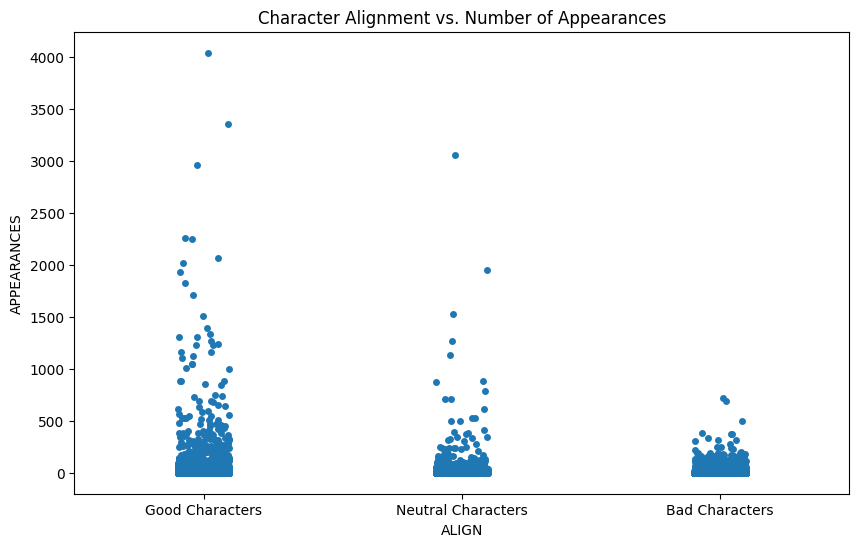

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv'
marvel_df = pd.read_csv(url)

# Strip plot: Alignment vs Appearances
plt.figure(figsize=(10,6))
sns.stripplot(data=marvel_df, x='ALIGN', y='APPEARANCES', jitter=True)
plt.title('Character Alignment vs. Number of Appearances')
plt.show()

Question: How many characters from each alignment appear more than 2000 times?

## Q3. Multiples of Strip plots
Come up with a question using this dataset and use a strip plot that contains multiples (splitting the plot into multiples by a category that has two or more unique values) by using the `row` or `col` argument. State your question in a markdown cell. Recall that a strip plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

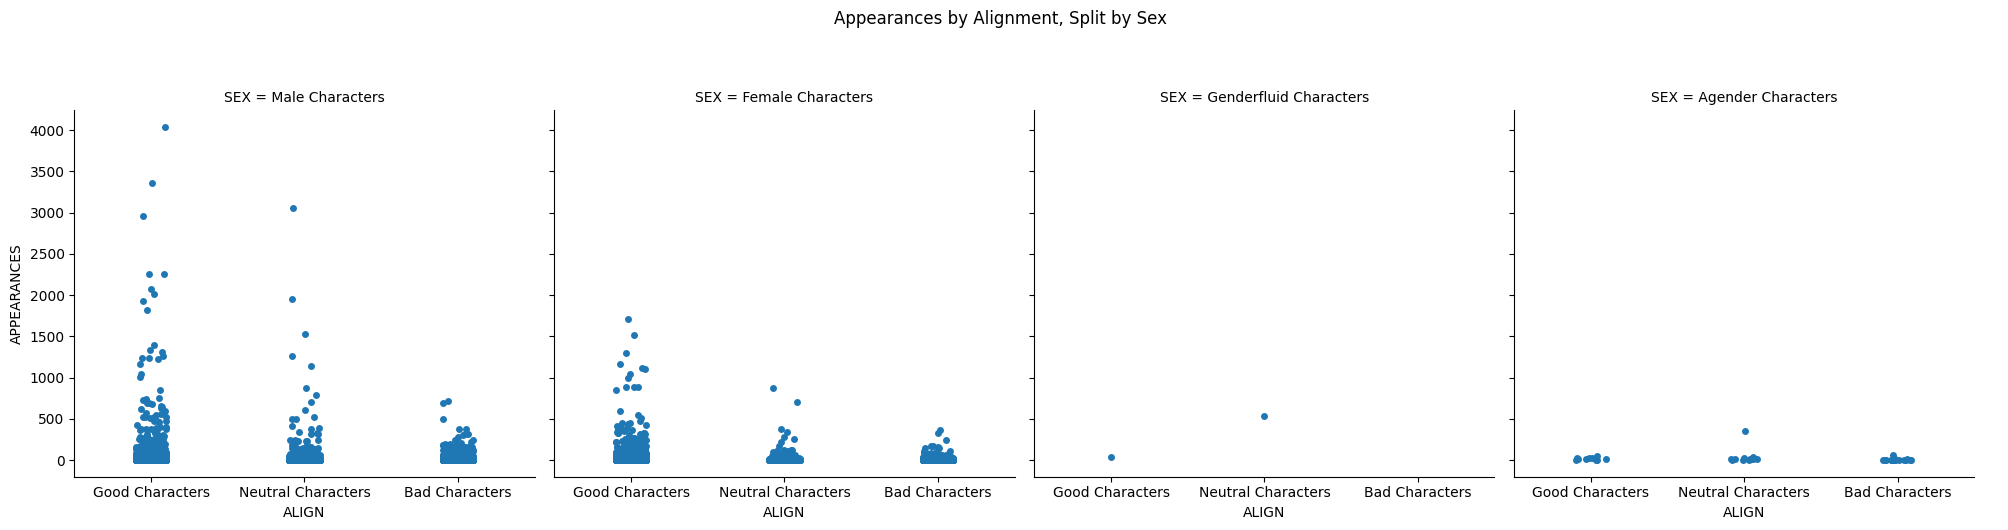

In [ ]:
# Strip plot with multiples: Alignment vs Appearances, split by Sex
g = sns.catplot(data=marvel_df, x='ALIGN', y='APPEARANCES', col='SEX', kind='strip', jitter=True, height=5, aspect=1)
g.fig.suptitle('Appearances by Alignment, Split by Sex', y=1.05)  # Adjust the y-position of the title
g.fig.subplots_adjust(top=0.85)  # Adjust the top space to fit the title
plt.show()

Question: Is there a bias toward any sex or gender appearance?

## Q4. Swarm plot
Come up with a question using this dataset and use a `swarm` plot to help answer the question. State your question in a markdown cell. Recall that a `swarm` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


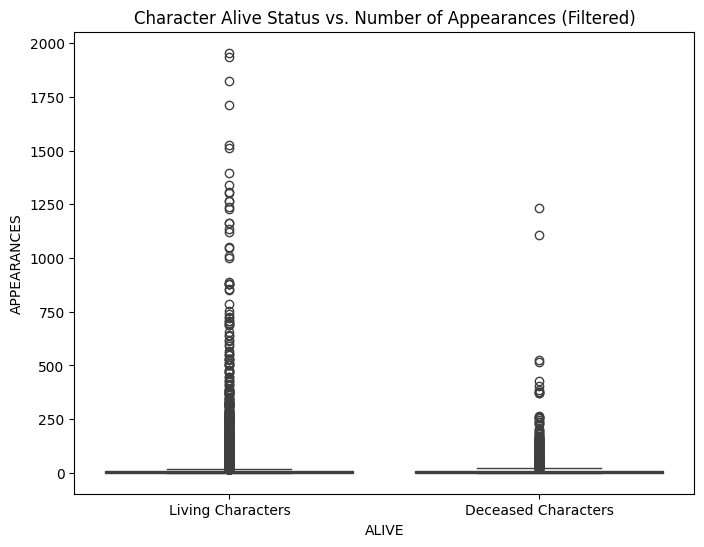

In [ ]:
# Filter dataset to characters with fewer than 2000 appearances
filtered_df = marvel_df[marvel_df['APPEARANCES'] < 2000]

# Box plot: Alive vs Appearances
plt.figure(figsize=(8,6))
sns.boxplot(data=filtered_df, x='ALIVE', y='APPEARANCES')
plt.title('Character Alive Status vs. Number of Appearances (Filtered)')
plt.show()

Question: How many characters appear less than 2000 times?

## Q5. Box plots
Box plot is one of the most commonly used plot for visualizing data distribution. We can convert the `swamp` plot into a `box` plot by simply changing the kind argument to `kind="box"`. Convert the swarm plot that you created in Q4 with a boxplot here. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


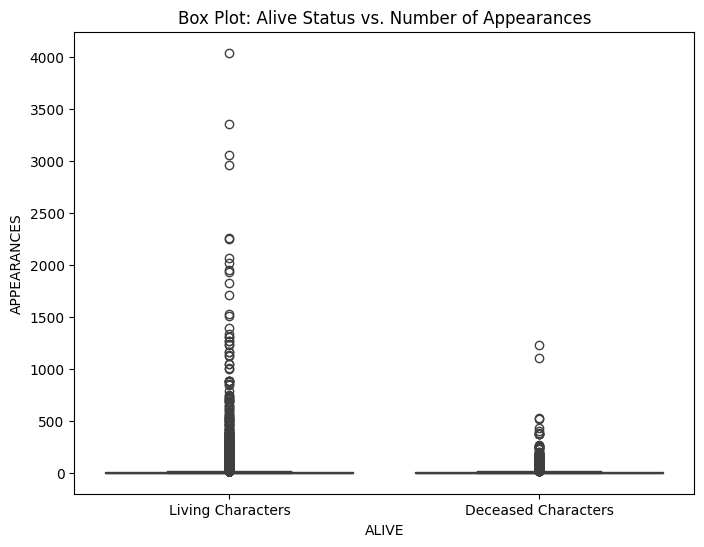

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=marvel_df, x='ALIVE', y='APPEARANCES')
plt.title('Box Plot: Alive Status vs. Number of Appearances')
plt.show()

## Q6. Violin plots
Come up with a question using this dataset and use a `violin` plot to help answer the question. State your question in a markdown cell. Recall that a `violin` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. You might want to set setting `cut` to zero if the distribution spreads beyond the values of the data in the dataset. Be sure to include a meaning title for the plot.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

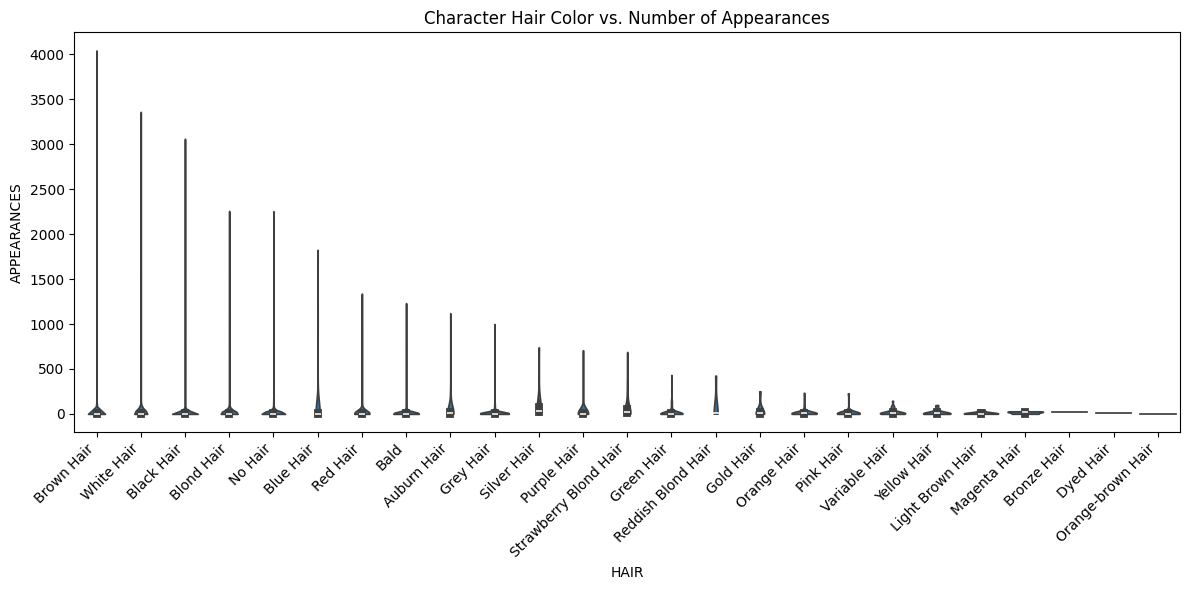

In [ ]:
# Violin plot: Hair color vs Appearances with rotated x-axis labels
plt.figure(figsize=(12,6))
sns.violinplot(data=marvel_df, x='HAIR', y='APPEARANCES', cut=0)
plt.title('Character Hair Color vs. Number of Appearances')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate the labels by 45 degrees
plt.tight_layout()  # Adjust layout to ensure everything fits

plt.show()

Question: What is the most common hair color to appear?

> Brown hair



## Bonus:
Because violin plots are symetrical, when we have only two categories we can put one on each side with `split = True`. Try to create a violin plot using the `split` parameter. You will need to come up with a dataframe using this dataset with data that has two categories.